[nltk_data] Downloading package punkt to /Users/spencer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/spencer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('state', 16063), ('city', 15045), ('company', 14663), ('management', 11996), ('name', 11737), ('sales', 8124), ('skills', 7693), ('business', 7686), ('customer', 7607), ('new', 6336), ('service', 5994), ('team', 5870), ('development', 5648), ('experience', 5614), ('training', 5557), ('project', 5244), ('work', 4699), ('information', 4471), ('marketing', 4360), ('manager', 4306)]


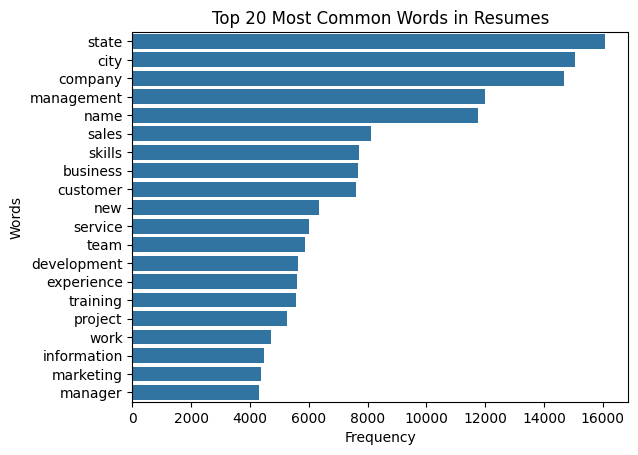

In [3]:
# Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Set the display option to show more text
pd.set_option('display.max_colwidth', None)

# Define the path to the dataset and load it
dataset_path = '../data/raw/Resume.csv'
df = pd.read_csv(dataset_path)

# Display the first few entries for reference
df.head()

# Function to clean the text
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]*>', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in set(stopwords.words('english'))]
    # Rejoin tokens into string
    text = ' '.join(filtered_tokens)
    return text

# Clean the resume text
df['cleaned_resume'] = df['Resume_str'].apply(clean_text)

# Display the cleaned text for verification
df[['Resume_str', 'cleaned_resume']].head()

# Save the cleaned data to the interim folder
cleaned_dataset_path = '../data/interim/cleaned_resumes.csv'
df.to_csv(cleaned_dataset_path, index=False)

# Combine all text into one large string and tokenize
all_text = ' '.join(df['cleaned_resume'])
all_tokens = word_tokenize(all_text)

# Count and display the most common words
word_freq = nltk.FreqDist(all_tokens)
most_common_words = word_freq.most_common(20)
print(most_common_words)

# Plot the most common words for visualization
sns.barplot(x=[count for word, count in most_common_words], y=[word for word, count in most_common_words])
plt.title('Top 20 Most Common Words in Resumes')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()